In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

1. Objectives
- Predicting phishing websites
- Model: Decision Tree

2. Data Exploring<br> 
Data: (example size, features) = (11055, 30)
- Features have values in [-1, 0, 1]
   - -1: Legitimate
   - 0: Suspicious
   - 1: phishing
- Decision (result) has value in [-1,1] ~ [Legitimate, phishing] <br/><br/>
(Detail in [Phishing Websites Features](Phishing Websites Features.docx))<br/>

In [184]:
df = pd.read_csv('data/phishing.csv', sep=";")

In [185]:
df.shape

(11055, 31)

In [186]:
df = df.dropna(axis=0, how='all')
df = df.drop_duplicates()

In [187]:
df.shape

(5849, 31)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            5849 non-null   int64
 1   URL_Length                   5849 non-null   int64
 2   Shortining_Service           5849 non-null   int64
 3   having_At_Symbol             5849 non-null   int64
 4   double_slash_redirecting     5849 non-null   int64
 5   Prefix_Suffix                5849 non-null   int64
 6   having_Sub_Domain            5849 non-null   int64
 7   SSLfinal_State               5849 non-null   int64
 8   Domain_registeration_length  5849 non-null   int64
 9   Favicon                      5849 non-null   int64
 10  port                         5849 non-null   int64
 11  HTTPS_token                  5849 non-null   int64
 12  Request_URL                  5849 non-null   int64
 13  URL_of_Anchor                5849 non-null   int64
 

In [189]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWindow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

### Check if data is imbalanced

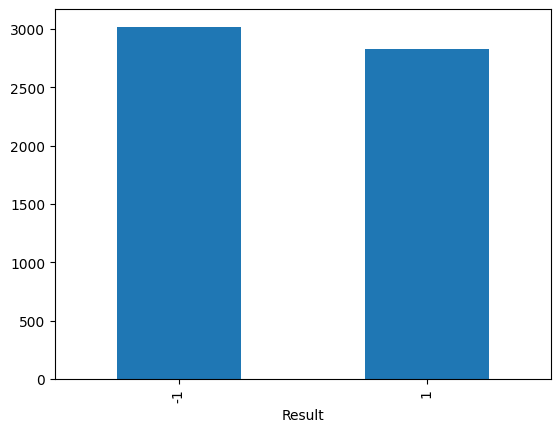

In [190]:
df.Result.value_counts().plot.bar()
plt.show()

From the chart, SSS_FinalState, Prefix_Suffix, and URL_of_Anchor can be the main features for categorizing the Result.

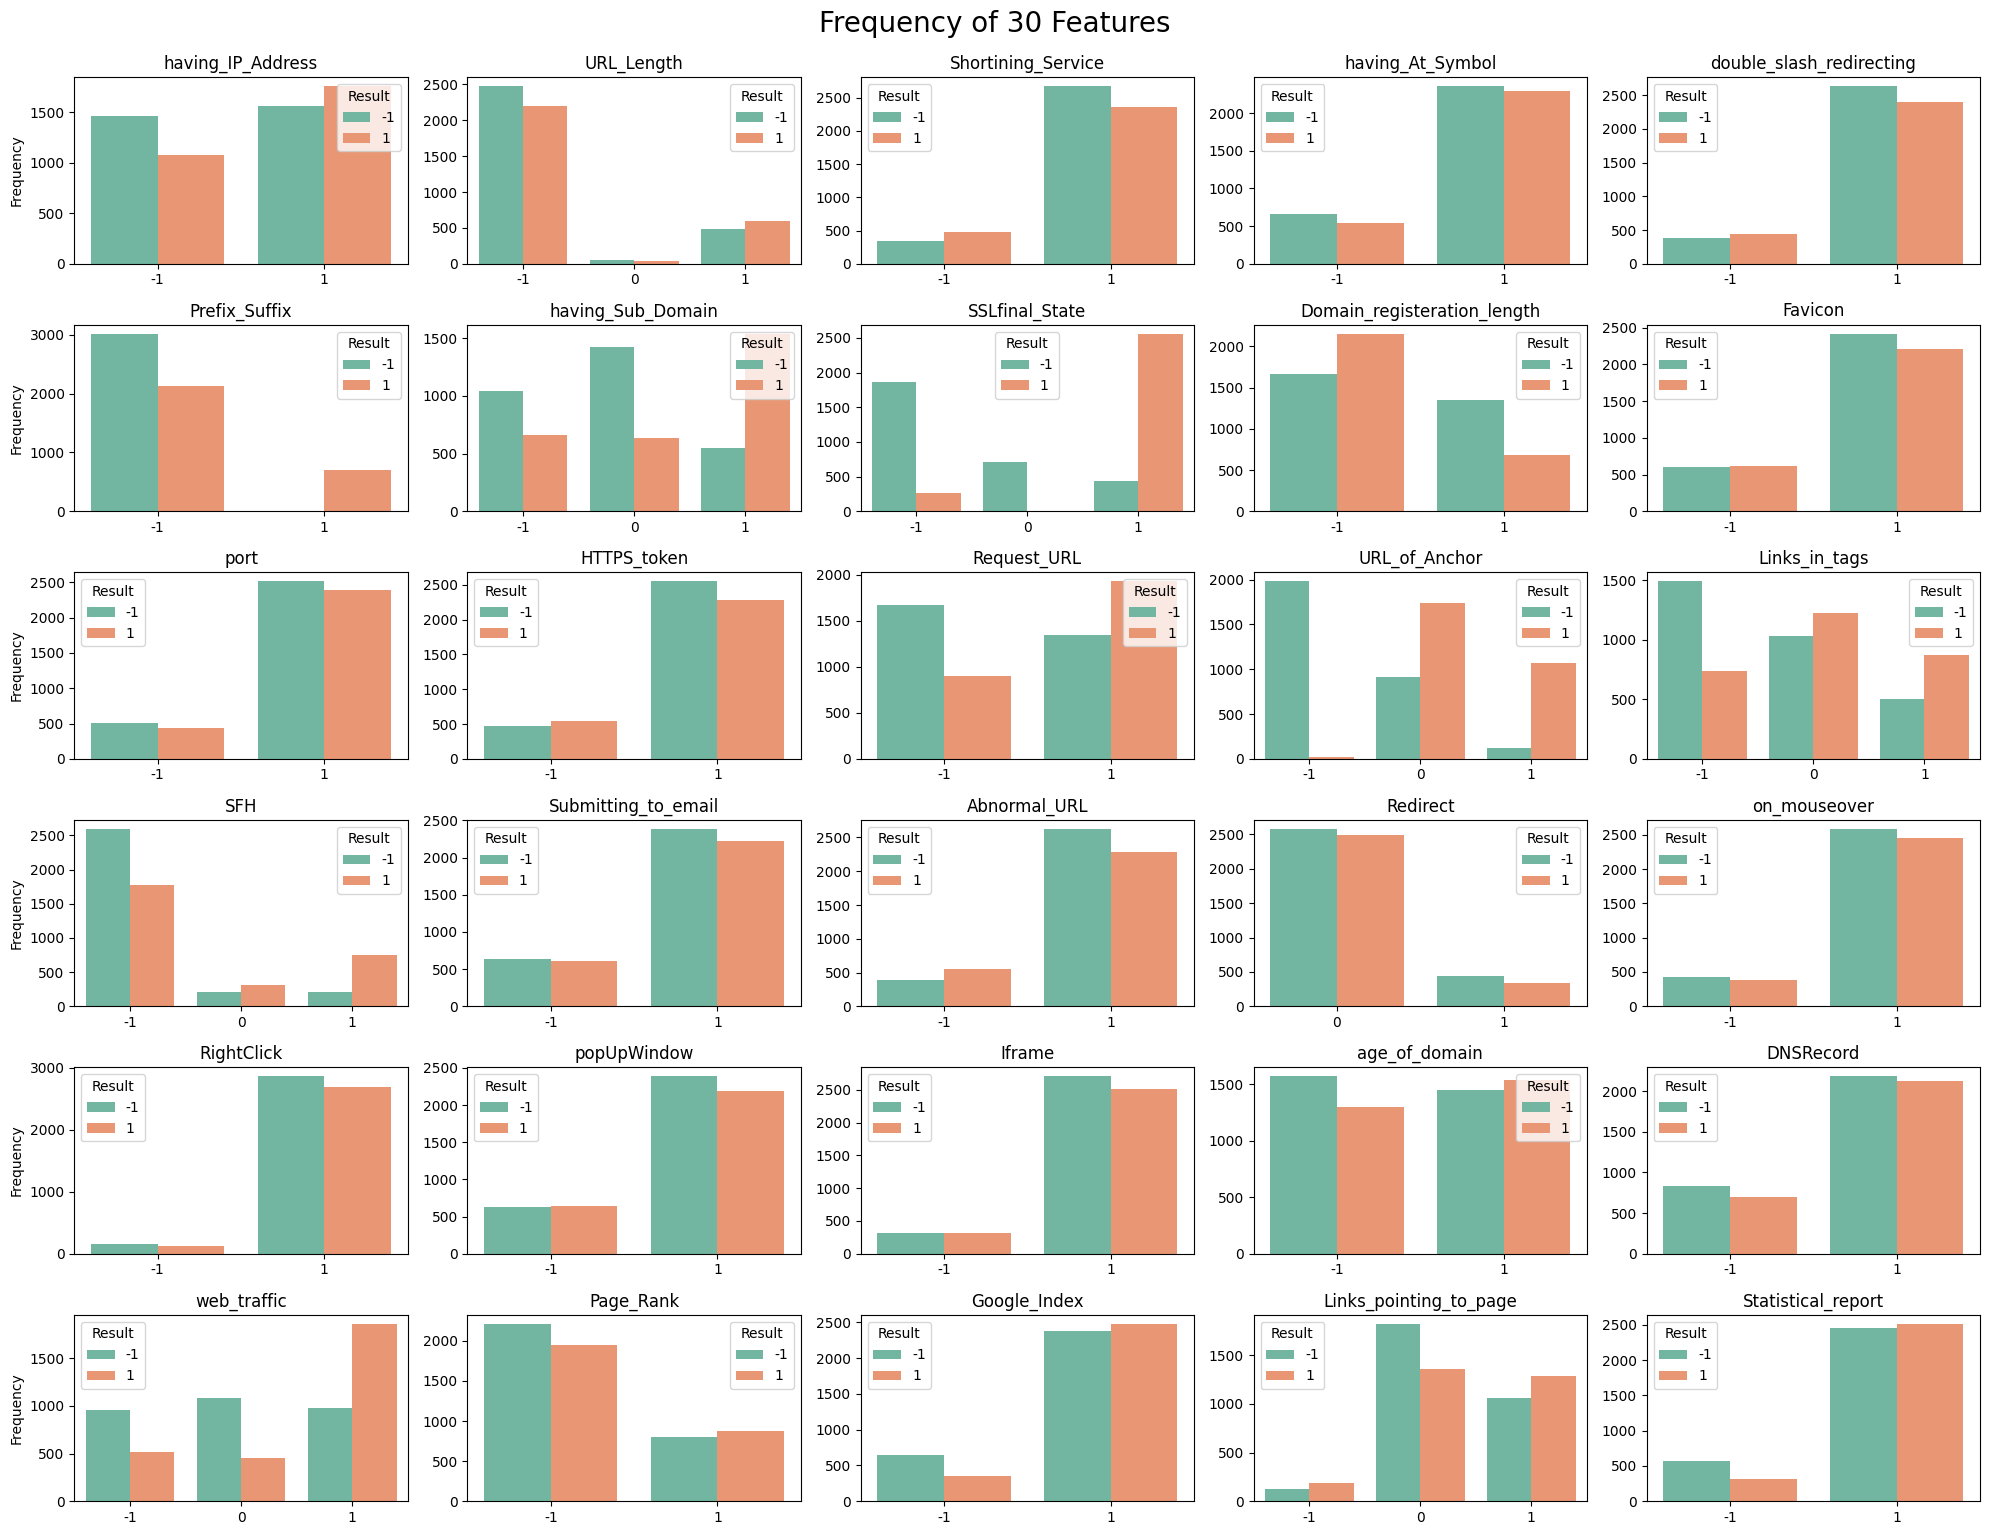

In [191]:
fig, axes = plt.subplots(6, 5, figsize=(20, 15))  # 6 rows x 5 columns grid
axes = axes.flatten()

for i, col in enumerate(df.columns.drop('Result')):
    sns.countplot(x=col, hue='Result', data=df, palette='Set2', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency' if i % 5 == 0 else '')

plt.tight_layout()
plt.suptitle('Frequency of 30 Features', fontsize=20, y=1.02)
plt.show()


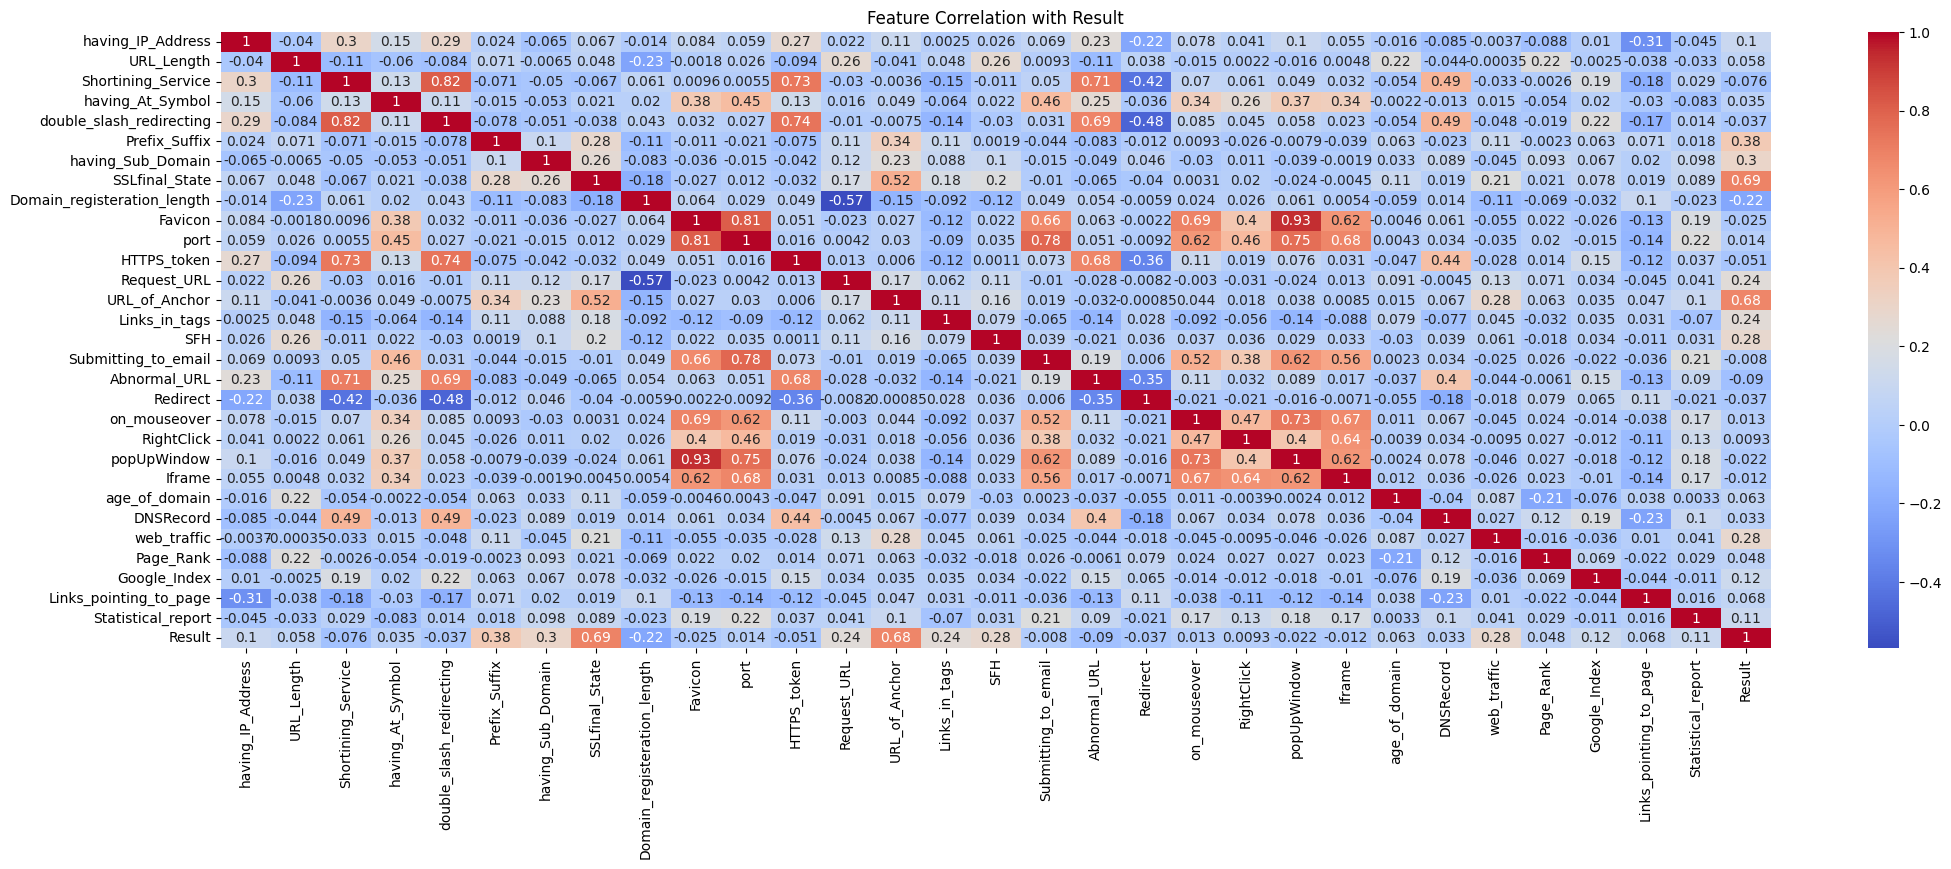

In [192]:
corr = df.corr() 
plt.figure(figsize=(25,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Result')
plt.show()

Delete variables with high correlations (>0.8)

In [193]:

colums_to_delete = np.array(['double_slash_redirecting', 'Favicon'])
df = df.drop(columns=colums_to_delete, axis=1)

In [194]:
import statsmodels.api as sm 

X2 = sm.add_constant(df.iloc[:, :-1])
model = sm.OLS(df['Result'], X2)
result = model.fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                 Result   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     459.7
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        00:07:42   Log-Likelihood:                -4884.1
No. Observations:                5849   AIC:                             9826.
Df Residuals:                    5820   BIC:                         1.002e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Use OLS (Linear Regression) from the statsmodels library to remove unimportant variables.

In [195]:
pvalues = result.pvalues
colums_to_drop = pvalues[pvalues >= 0.05].index 
df = df.drop(columns=colums_to_drop)

In [196]:
X2 = sm.add_constant(df.iloc[:, :-1])
model = sm.OLS(df['Result'], X2)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Result   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     584.3
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        00:07:42   Log-Likelihood:                -4888.9
No. Observations:                5849   AIC:                             9824.
Df Residuals:                    5826   BIC:                             9977.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

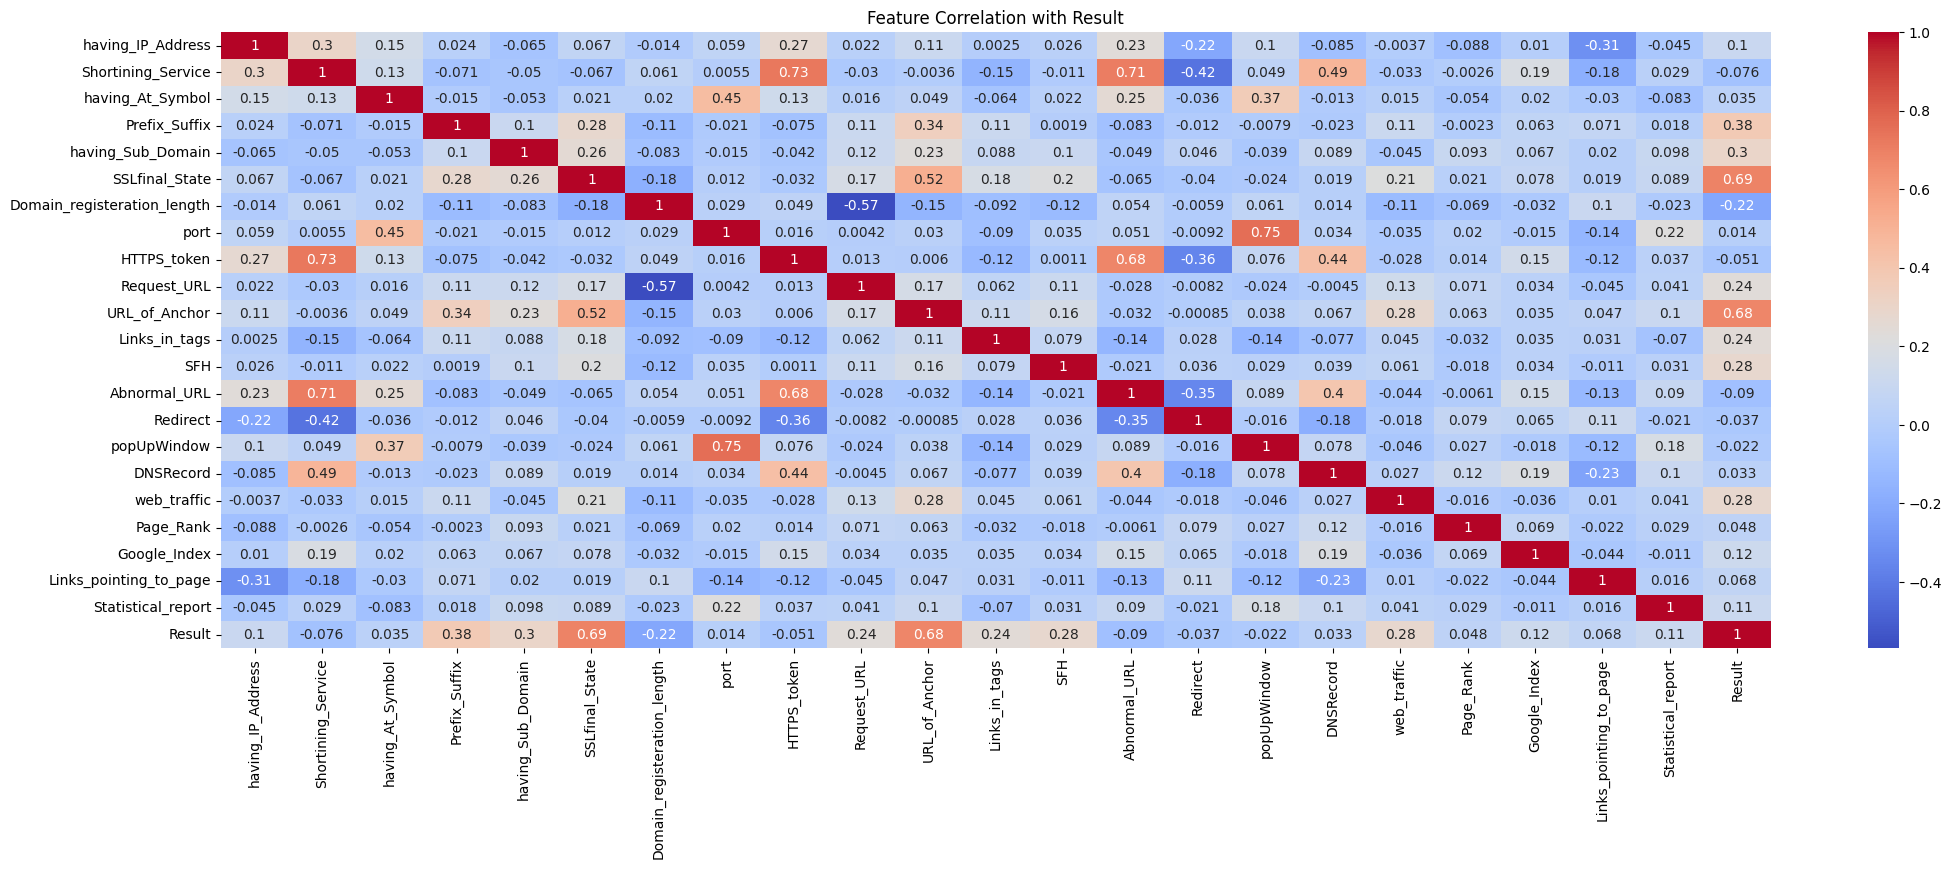

In [197]:
corr = df.corr() 
plt.figure(figsize=(25,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Result')
plt.show()

3. Data preparation 

In [198]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [199]:
X = df.iloc[:, :-1]
y_true = df.iloc[:, -1]

In [200]:
feature_names = X.columns
class_names = ['Legitimate', 'Phishing'] # order asc -1, 1

In [201]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=.2, random_state=42)

In [202]:
print(X_train.shape)
print(X_test.shape)

(4679, 22)
(1170, 22)


4. Modelling

In [203]:
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [204]:
print(tree.export_text(classifier,feature_names=feature_names, class_names=class_names))

|--- SSLfinal_State <= 0.50
|   |--- Prefix_Suffix <= 0.00
|   |   |--- URL_of_Anchor <= -0.50
|   |   |   |--- class: Legitimate
|   |   |--- URL_of_Anchor >  -0.50
|   |   |   |--- class: Legitimate
|   |--- Prefix_Suffix >  0.00
|   |   |--- class: Phishing
|--- SSLfinal_State >  0.50
|   |--- URL_of_Anchor <= -0.50
|   |   |--- Prefix_Suffix <= 0.00
|   |   |   |--- class: Legitimate
|   |   |--- Prefix_Suffix >  0.00
|   |   |   |--- class: Phishing
|   |--- URL_of_Anchor >  -0.50
|   |   |--- SFH <= -0.50
|   |   |   |--- class: Phishing
|   |   |--- SFH >  -0.50
|   |   |   |--- class: Phishing



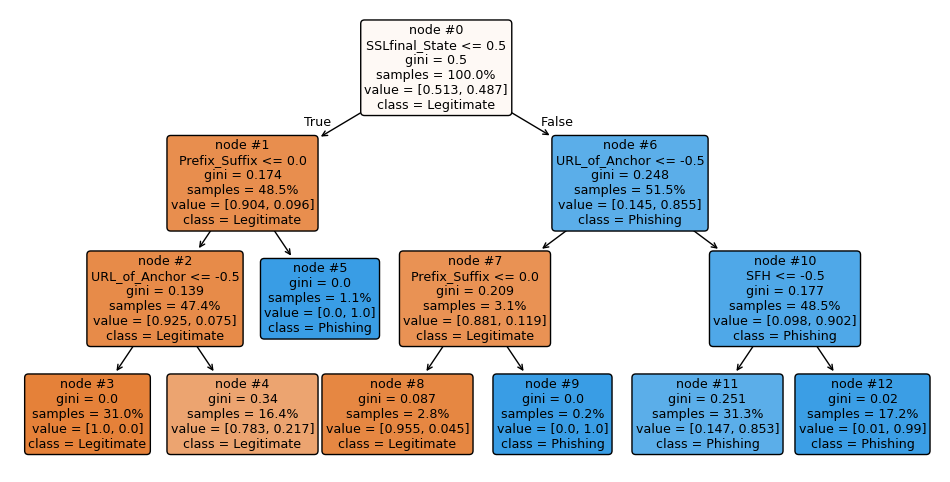

In [205]:
plt.figure(figsize=(12,6))
tree.plot_tree(classifier,feature_names=feature_names, class_names=class_names,
            label='all', # label for gini value
            filled=True, 
            impurity=True, # gini
            node_ids=True, # node id
            proportion=True,
            rounded=True,
            precision=3,
            ax=None,
            fontsize=None
            )  
plt.show()

5. Evaluation

In [206]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [207]:
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n",matrix)
print("Accuracy calculated from the training set = %.3f (SUBJECT TO OVERFITTING)" % (accuracy))
print(classification_report(y_test, y_pred, target_names=['no','yes']))
y_pred_proba

Confusion matrix:
 [[563  57]
 [ 50 500]]
Accuracy calculated from the training set = 0.909 (SUBJECT TO OVERFITTING)
              precision    recall  f1-score   support

          no       0.92      0.91      0.91       620
         yes       0.90      0.91      0.90       550

    accuracy                           0.91      1170
   macro avg       0.91      0.91      0.91      1170
weighted avg       0.91      0.91      0.91      1170



array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.00995025, 0.99004975],
       [1.        , 0.        ],
       [1.        , 0.        ]], shape=(1170, 2))

In [208]:
k = 10 
scores = cross_val_score(estimator=classifier, X=X_test, y=y_test, cv=k, scoring='accuracy')
print("Accuracies from %d individual folds:" % k)
print(scores)
print("Accuracy calculated using %d-fold cross validation = %.3f" % (k, scores.mean()))

Accuracies from 10 individual folds:
[0.91452991 0.94017094 0.86324786 0.92307692 0.90598291 0.91452991
 0.82905983 0.94017094 0.90598291 0.92307692]
Accuracy calculated using 10-fold cross validation = 0.906


### Tuning hyperparameters of the model using GridSearchCV

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


pipeline = Pipeline(steps=[
    ('model', tree.DecisionTreeClassifier())
])
param_grid = {
    'model__max_depth': [2, 3, 4], 
    'model__criterion':['gini','entropy'],
    'model__min_samples_split':[2,4],
    'model__min_samples_leaf':[5, 10, 13]
}
# n_jobs=-1: số core để chạy parallel, -1: all
# verbose: mức detail của output (0, 1, 2, 3)
grid = GridSearchCV(pipeline,param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', return_train_score=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,Pipeline(step...lassifier())])
,param_grid,"{'model__criterion': ['gini', 'entropy'], 'model__max_depth': [2, 3, ...], 'model__min_samples_leaf': [5, 10, ...], 'model__min_samples_split': [2, 4]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'gini'


**Hyperparameters that model gets the highest score on the train set:**
- criterion: 'entropy'
- max_depth:  
- min_samples_leaf: 5
- min_samples_split: 2

In [210]:
grid.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 3,
 'model__min_samples_leaf': 5,
 'model__min_samples_split': 2}

In [212]:
grid.best_estimator_

,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None


### Conclusions:
Based on the analysis and the results obtained from the decision tree model, we can conclude that the top features for distinguishing phishing websites are:
- SSLfinal_State
- URL_of_Anchor
- Web_traffic
 
To reduce the risk of falling victim to phishing pages, consider asking yourself the following questions when visiting a website:
- Does the site appear technically secure and use a valid HTTPS connection?
- Do most clickable links stay within the same domain, or do they redirect you elsewhere?
- Is the site well-known and receives regular web traffic, or is it obscure and rarely visited? 
<br><br>
If you answer “yes” to those questions, there is a high chance that the site is a phishing attempt.